Import modules:

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

Parameters:

In [2]:
# defined globaly?
m = 1
v = 10
epsilon = 0.3
tau0 = 0.4
tau1 = 0.1
kappa = 0.4

**Question 1**

Functions:

In [3]:
# excercise 4

# a. utility_function

def utility_function(c,l,v=v,epsilon=epsilon):
    return np.log(c) - v*(l**(1+1/epsilon)/(1+1/epsilon))

# b. c_function, where c* = x becuase of monoticity 

def c_function(l,w,m=m,tau0=tau0,tau1=tau1,kappa=kappa):
    return m + w*l - (tau0*w*l + tau1*np.max(w*l-kappa,0))

# c. utility_constrained, where c = c_function

def utility_constrained(l,w,v=v,epsilon=epsilon,tau0=tau0,tau1=tau1,kappa=kappa):
    c = c_function(l,w,m=m,tau0=tau0,tau1=tau1,kappa=kappa)
    return utility_function(c,l,v,epsilon)

Solver function:

In [84]:
bounds = [(0,1)]

def solution_function(w,v=v,epsilon=epsilon,tau0=tau0,tau1=tau1,kappa=kappa):  
    initial_guess = 0.5
    l_optimal = optimize.minimize(
        lambda l: -utility_constrained(l,w,v=v,epsilon=epsilon,tau0=tau0,tau1=tau1,kappa=kappa),
        initial_guess,method='SLSQP',bounds=bounds)
    return l_optimal
    print(l_optimal.message) # check that the solver has terminated correctly (place here; l_optimal defined localy)

# check optimizer 
print(solution_function(1)) # test optimizer: w = 1

     fun: -0.17217215210801498
     jac: array([-0.00121016])
 message: 'Optimization terminated successfully.'
    nfev: 16
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.3821357])


**Question 2**

Plot l* and c* as functions of w in range(0.5,1.5):

[0.5        0.61111111 0.72222222 0.83333333 0.94444444 1.05555556
 1.16666667 1.27777778 1.38888889 1.5       ]
[0.31955951 0.33733084 0.35246176 0.36559671 0.37677329 0.38720119
 0.39654554 0.404984   0.41266128 0.41968386]
[1.11988988 1.14307331 1.16727786 1.19233196 1.21792072 1.24435619
 1.27131823 1.29873978 1.32657033 1.3547629 ]


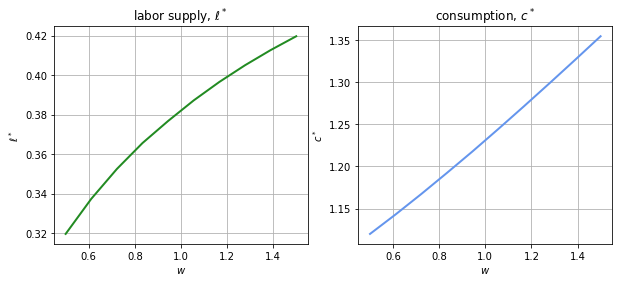

In [100]:
# setup
N = 10
w_vec = np.linspace(0.5,1.5,N) # Return evenly spaced numbers over a specified interval
l_vec = np.empty(N) # Return a new array of given (same N) shape and type, without initializing entries
c_vec = np.empty(N)

# I. optimal l's => loop through w and adding solutions for l to l_vec
for i,w in enumerate(w_vec):
    l_vec[i] = solution_function(w).x[0]
    
print(w_vec) # check elements
print(l_vec) # check elements

# II. optimal c's
for i,w in enumerate(w_vec):
    l = solution_function(w).x[0]
    c_vec[i] = c_function(l,w)

print(c_vec) # check elements

fig = plt.figure(figsize = (10,4))

# left plot
ax_left = fig.add_subplot(1,2,1)
ax_left.plot(w_vec,l_vec,lw=2,color='forestgreen')

ax_left.set_title('labor supply, $\ell^*$')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$\ell^*$')
ax_left.grid(True)

# right plot
ax_right = fig.add_subplot(1,2,2)
ax_right.plot(w_vec,c_vec,lw=2,color='cornflowerblue')

ax_right.set_title('consumption, $c^*$')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^*$')
ax_right.grid(True)

[0.5        0.61111111 0.72222222 0.83333333 0.94444444 1.05555556
 1.16666667 1.27777778 1.38888889 1.5       ]
[0.31955951 0.33733084 0.35246176 0.36559671 0.37677329 0.38720119
 0.39654554 0.404984   0.41266128 0.41968386]


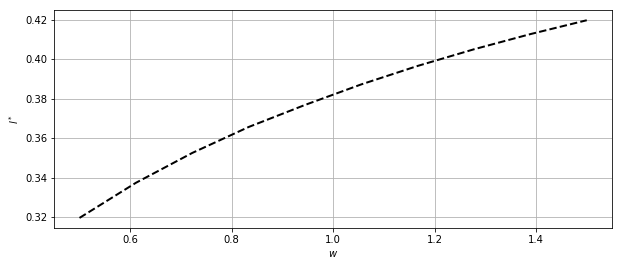

In [66]:
# b. figure

fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1,1,1)

N = 10
w_vec = np.linspace(0.5,1.5,N) # Return evenly spaced numbers over a specified interval
l_vec = np.empty(N) # Return a new array of given (same N) shape and type, without initializing entries



# extra

for i,w in enumerate(w_vec):
    initial_guess = 0.5
    l_optimal = optimize.minimize(
        lambda l: -utility_constrained(l,w,v=v,epsilon=epsilon,tau0=tau0,tau1=tau1,kappa=kappa),
        initial_guess,method='SLSQP',bounds=bounds)
    l_vec[i] = l_optimal.x[0]
    

    
    
# plot

for i,w in enumerate(w_vec):
    l_vec[i] = solution_function(w).x[0]
    
print(w_vec) # check elements
print(l_vec) # check elements

# left and right
ax.plot(w_vec,l_vec,ls='--',lw=2,color='black',label='$f(x)$')

ax.set_xlabel('$w$')
ax.set_ylabel('$l^*$')
# ax.set_xlim([0,x2_max])
# ax.set_ylim([0,x2_max])
ax.grid(True)

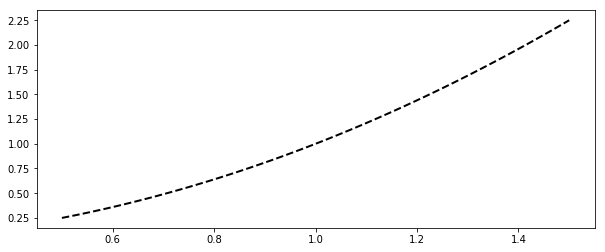

In [64]:
# extra: simple plot

def f(x):
    return x**2

fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1,1,1)

N = 100
x_vec = np.linspace(0.5,1.5,N) # Return evenly spaced numbers over a specified interval
f_vec = np.empty(N) # Return a new array of given shape and type, without initializing entries

for i,x in enumerate(x_vec):
    f_vec[i] = f(x)

ax.plot(x_vec,f_vec,ls='--',lw=2,color='black',label='$f(x)$')

Liste:
Metode til at håndtere mange parametre